In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import os
import matplotlib.pyplot as plt

In [6]:
start_year = 2014
end_year = 2016
start = pd.datetime(start_year, 1, 1)
end = pd.datetime(end_year, 12, 31)
code = 'AJL.AX'
code_dat = web.DataReader(code, 'yahoo', start, end)

In [11]:
current = code_dat
previous = code_dat.shift(1)

In [12]:
code_dat.loc[:, 'typical_price'] = (code_dat.loc[:, 'High'] + code_dat.loc[:, 'Low'] + code_dat.loc[:, 'Close']) / 3
code_dat.loc[:, 'chcl'] = current.loc[:, 'High'] - current.loc[:, 'Low']
code_dat.loc[:, 'chpc'] = (current.loc[:, 'High'] -  previous.loc[:, 'Close']).abs()
code_dat.loc[:, 'clpc'] = (current.loc[:, 'Low'] - previous.loc[:, 'Close']).abs()
code_dat.loc[:, 'tr'] = code_dat.loc[:, ['chcl', 'chpc', 'clpc']].max(axis=1)

In [13]:
n_days_ewm = 20
n_days_atr = 10

In [14]:
rolling_ewm = code_dat.ewm(span=n_days_ewm)

In [15]:
centre = rolling_ewm['typical_price'].mean()

In [20]:
rolling_atr = code_dat.ewm(span=n_days_atr)

In [21]:
atr = rolling_atr['tr'].mean()

In [22]:
up_band = centre + atr
down_band = centre - atr

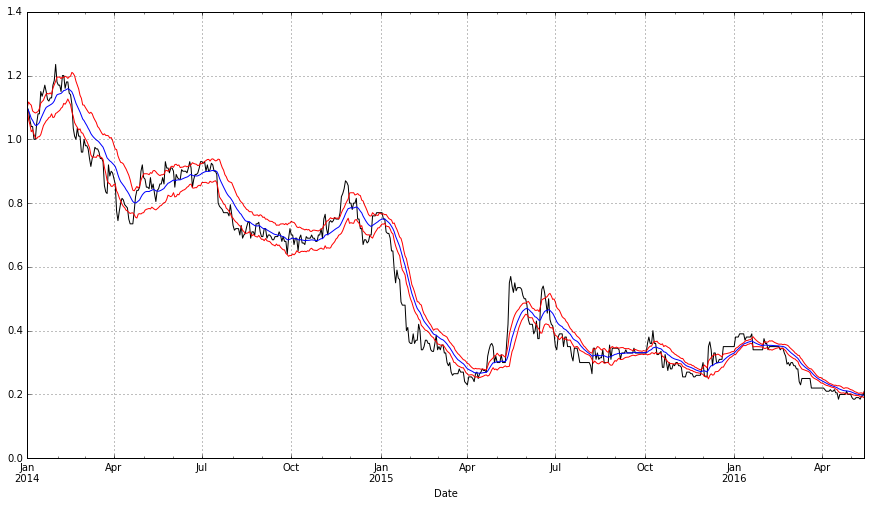

In [23]:
plt.figure(figsize=(15, 8))
ax = plt.subplot(111)
close_price.plot(ax=ax, color='k')
centre.plot(ax=ax, color='b')
up_band.plot(ax=ax, color='r')
down_band.plot(ax=ax, color='r')
plt.grid()